# Natural Logarithm ln(x) Taylor Formula testifation

## Implementation From Scratch

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from IPython import display

In [3]:
def set_figsize(figsize = (3.5, 2.5)):
    display.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize'] = figsize

In [4]:
#从ln(1+x)出发，将x看做是变化量进行求解
def origin_fn(x):
    y = np.log(1+x)
    return y
def ln_fn_0(x):
    return np.array([0])
def ln_fn_1(x):
    y = x
    return y
def ln_fn_2(x):
    y = (-1/2)*(x**2)
    return y 
def ln_fn_3(x):
    y = (1/3)*(x**3)
    return y
def ln_fn_4(x):
    y = -(1/4)*(x**4)
    return y    

In [5]:
x = np.linspace(-0.5, 2, 50)

Text(0.5, 1.0, '3rd order')

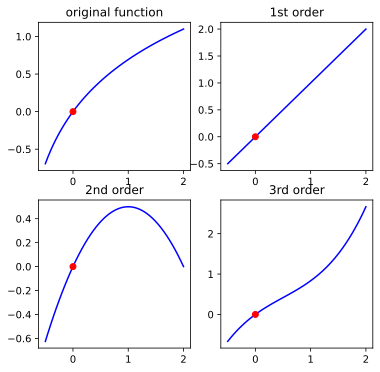

In [6]:
# drow in different figures
set_figsize(figsize = (6,6))
plt.figure(figsize = (6,6), dpi = 80)
# original function
ax1 = plt.subplot(221)
ax1.plot(x, origin_fn(x), color = 'b', linestyle = '-')
ax1.plot([0], [0], 'ro')
ax1.set_title('original function')
# 1st order 
ax2 = plt.subplot(222)
ax2.plot(x, ln_fn_0(x) + ln_fn_1(x), color = 'b', linestyle = '-')
ax2.plot([0], [0], 'ro')
ax2.set_title('1st order')
# 2nd order
ax3 = plt.subplot(223)
ax3.plot(x, ln_fn_0(x) + ln_fn_1(x)+ln_fn_2(x), color = 'b', linestyle = '-')
ax3.plot([0],[0], 'ro')
ax3.set_title('2nd order')
# 3rd order
ax4 = plt.subplot(224)
ax4.plot(x, ln_fn_0(x) + ln_fn_1(x)+ln_fn_2(x)+ln_fn_3(x), color = 'b', linestyle = '-')
ax4.plot([0],[0], 'ro')
ax4.set_title('3rd order')

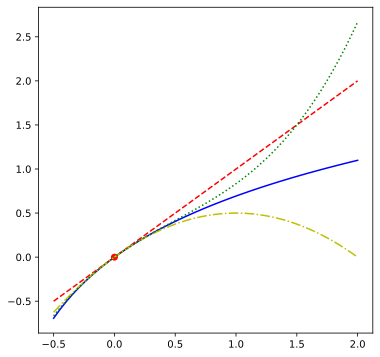

In [7]:
# drow in one figure
# drow in different figures
set_figsize(figsize = (6,6))
plt.figure(figsize = (6,6), dpi = 80)
# original function
plt.plot(x, origin_fn(x), color = 'b', linestyle = '-')
plt.plot([0], [0], 'ro')
plt.plot(x, ln_fn_0(x) + ln_fn_1(x), color = 'r', linestyle = '--')
plt.plot(x, ln_fn_0(x) + ln_fn_1(x)+ln_fn_2(x), color = 'y', linestyle = '-.')
plt.plot(x, ln_fn_0(x) + ln_fn_1(x)+ln_fn_2(x)+ln_fn_3(x), color = 'g', linestyle = ':')

## Concise implementation with sympy

In [8]:
# based on the elementary defination 也就是从ln（x）出发
# 这部分所用的内容就是符号计算，可以算出解析解，不用在意精度
from sympy import diff, Symbol, integrate, log, factorial, sin, cos

In [193]:
x = Symbol('x')
f = log(1+x)

In [65]:
def solve_value(f, t_seq):
    value_seq = []
    param = deep_search_param(f.args)
    
    def value_with_sympy(fn,t): 
        return fn.evalf(subs = {param:t})
    
    for i in t_seq:
        value_seq.append(np.array(value_with_sympy(f,i),dtype = 'float32'))
    
    return np.round(np.array(value_seq),6)

In [10]:
def taylor_formula(f,x0,n):
    t = Symbol('t')
    final_formula = f.subs(x,x0)
    for i in range(n):
        final_formula += (diff(f,x,i+1).subs(x,x0)/factorial(i+1))*(t-x0)**(i+1)
    return final_formula

In [66]:
def deep_search_param(args_tuple): 
    for arg in args_tuple:
        if arg.args:
            param = deep_search_param(arg.args)
            if param:
                break
        elif isinstance(arg, Symbol):
            param = arg
            break
    return param            

In [85]:
x_value = np.linspace(-5, 5, 100)

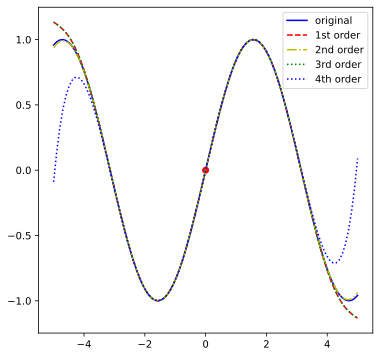

In [89]:
# drow in one figure
# drow in different figures
set_figsize(figsize = (6,6))
plt.figure(figsize = (6,6), dpi = 80)
# original function
plt.plot(x_value, solve_value(f, x_value), color = 'b', linestyle = '-', label = 'original')
plt.plot([0], [0], 'ro')
plt.plot(x_value, solve_value(taylor_formula(f,0,11), x_value), color = 'r',linestyle = '--', label = '1st order')
plt.plot(x_value, solve_value(taylor_formula(f,0,14), x_value), color = 'y', linestyle = '-.', label = '2nd order')
plt.plot(x_value, solve_value(taylor_formula(f,0,12), x_value), color = 'g', linestyle = ':', label = '3rd order')
plt.plot(x_value, solve_value(taylor_formula(f,0,9), x_value), color = 'b', linestyle = ':', label = '4th order')
plt.legend()

## Concise implementation with scipy

In [121]:
# 还是从ln(x)出发，这部分利用的计算方法为数值计算,只有模块能导入函数不能导入
from scipy.misc import derivative
from scipy.special import factorial

In [348]:
def f(x):
    return np.log(1+x)

In [245]:
class taylor_formula():
    def __init__(self, f, x0, n):
        self.f = f
        self.x0 = x0
        self.n = n
        
    def taylor_value(self,x):
        sum = 0
        for i in range(self.n+1):
            sum += self.taylor_i_order(self.f, self.x0, i, x)
        return sum
    
    @staticmethod
    def taylor_i_order(f,x0,i,x):
        point_derative = round(derivative(f,x0, dx=1e-1,n=i, order=17),3)
        factorial_value = factorial(i)
        ploy_value = (x-x0)**i
        return (point_derative/factorial_value)*ploy_value

In [252]:
x_value = np.linspace(-5, 5, 100)
taylor_ln_0_1= taylor_formula(f, 0, 7)
taylor_ln_0_2= taylor_formula(f, 0, 8)
taylor_ln_0_3= taylor_formula(f, 0, 9)
taylor_ln_0_4= taylor_formula(f, 0, 10)

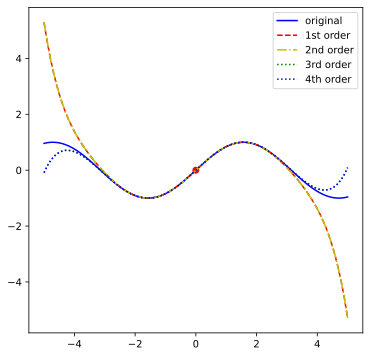

In [253]:
# drow in one figure
# drow in different figures
set_figsize(figsize = (6,6))
plt.figure(figsize = (6,6), dpi = 80)
# original function
plt.plot(x_value, np.apply_along_axis(f, 0, x_value), color = 'b', linestyle = '-', label = 'original')
plt.plot([0], [0], 'ro')
plt.plot(x_value, np.apply_along_axis(taylor_ln_0_1.taylor_value, 0, x_value), color = 'r',linestyle = '--', label = '1st order')
plt.plot(x_value, np.apply_along_axis(taylor_ln_0_2.taylor_value, 0, x_value), color = 'y', linestyle = '-.', label = '2nd order')
plt.plot(x_value, np.apply_along_axis(taylor_ln_0_3.taylor_value, 0, x_value), color = 'g', linestyle = ':', label = '3rd order')
plt.plot(x_value, np.apply_along_axis(taylor_ln_0_4.taylor_value, 0, x_value), color = 'b', linestyle = ':', label = '4th order')
plt.legend()

## Proof with Pytorch (on cuda) compare speed with other method
利用pytorch的自动微分功能，这一部分主要是以向量为视角

In [14]:
#  标注一下利用numpy实现包含相同元素的array
import numpy as np
ar = np.array([0.35]*8)
print(ar)
import torch
x0_tensor = torch.full([8],0.35)
print(x0_tensor)

[0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35]
tensor([0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500, 0.3500])


In [98]:
import torch
import time
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'

In [120]:
#def f(x):
#    return torch.log(1+x)
def f(x):
    return torch.sin(x)

In [83]:
def n_derivative(fn,n,x,x0,device):         #这些函数有更pytorchy解决方法
    x0_tensor = torch.tensor([x0],dtype = float, requires_grad = True)
    deri_list = []
    derivative_0 = (fn(x0_tensor),)
    deri_list.append(derivative_0[0].item())
    for i in range(n):
        locals()['derivative_'+str(i+1)] = torch.autograd.grad(eval('derivative_'+str(i))[0], x0_tensor, 
                                                               grad_outputs=torch.ones(x0_tensor.shape),
                                                               create_graph=True)
        deri_list.append(eval('derivative_'+str(i+1))[0].item())
        
    return torch.tensor(deri_list, device = device).repeat(len(x),1)

def n_factorial(n,x,device):   
    fac_list = torch.empty(n+1,dtype = float,device = device)
    for i in range(n+1):
        fac_list[i] = np.math.factorial(i)
    return fac_list.repeat(len(x),1)

def n_ploy(n,x,x0,device):
    x0_tensor = torch.full([len(x),n+1],x0, device =device)
    ploy_list = x.repeat(n+1,1).t().to(device)- x0_tensor
    for i in range(n+1):
        ploy_list[:,i] = ploy_list[:,i]**i
    return ploy_list

In [79]:
def taylor_n_value(fn,n,x0,x,device):
    deri_list_tensor = n_derivative(fn, n, x, x0, device)
    fac_list_tensor = n_factorial(n, x,device)
    ploy_list_tensor = n_ploy(n, x, x0, device)
    taylor_result_list = (deri_list_tensor/fac_list_tensor)*ploy_list_tensor    
    return taylor_result_list.sum(dim=1, keepdim = False)

In [130]:
x_tensor = torch.linspace(-6, 6, 50)

0.03690004348754883


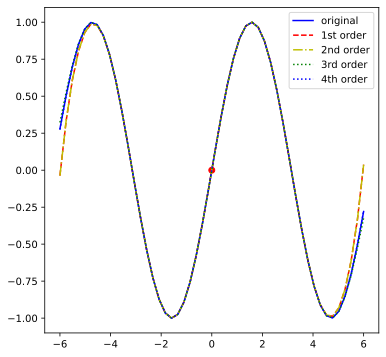

In [131]:
device = 'cpu'
start = time.time()
# drow in one figure
# drow in different figures
set_figsize(figsize = (6,6))
plt.figure(figsize = (6,6), dpi = 80)
# original function
plt.plot(x_tensor, f(x_tensor), color = 'b', linestyle = '-', label = 'original')
plt.plot([0], [0], 'ro')
plt.plot(x_tensor, taylor_n_value(f,14,0,x_tensor,device), color = 'r',linestyle = '--', label = '1st order')
plt.plot(x_tensor, taylor_n_value(f,13,0,x_tensor,device), color = 'y', linestyle = '-.', label = '2nd order')
plt.plot(x_tensor, taylor_n_value(f,15,0,x_tensor,device), color = 'g', linestyle = ':', label = '3rd order')
plt.plot(x_tensor, taylor_n_value(f,17,0,x_tensor,device), color = 'b', linestyle = ':', label = '4th order')
plt.legend()
print(time.time() - start)

0.33805274963378906


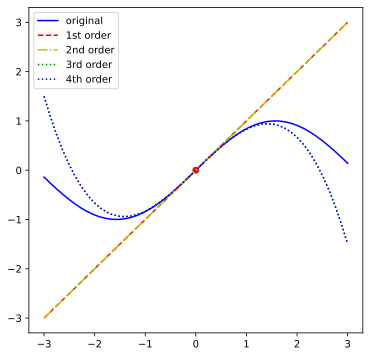

In [126]:
device = 'cuda'
start = time.time()
# drow in one figure
# drow in different figures
set_figsize(figsize = (6,6))
plt.figure(figsize = (6,6), dpi = 80)
# original function
plt.plot(x_tensor, f(x_tensor), color = 'b', linestyle = '-', label = 'original')
plt.plot([0], [0], 'ro')
plt.plot(x_tensor, taylor_n_value(f,1,0,x_tensor,device).cpu(), color = 'r',linestyle = '--', label = '1st order')
plt.plot(x_tensor, taylor_n_value(f,2,0,x_tensor,device).cpu(), color = 'y', linestyle = '-.', label = '2nd order')
plt.plot(x_tensor, taylor_n_value(f,3,0,x_tensor,device).cpu(), color = 'g', linestyle = ':', label = '3rd order')
plt.plot(x_tensor, taylor_n_value(f,4,0,x_tensor,device).cpu(), color = 'b', linestyle = ':', label = '4th order')
plt.legend()
print(time.time() - start)

## Proof with Integration of Sympy

有机会再试验一下吧，最近没有空了，妹妹可以尝试一下，就当是学习python了,就是我介绍给妹妹的那个积分理解泰勒公式的思路